# The Tully-Fisher relation for disk galaxies

The Tully-Fisher (TF) relation shows that for late type galaxies (disk galaxies), the luminosity is proportional to the maximum rotational velocity of the system[Tully & Fisher 1977]().

$$L \propto v_{max}^\gamma$$

As the velocity is almost entirely a result of the dark matter component of the total mass of the galaxy, this implies that for late type galaxies, the $M_{tot}/L$ relation is pretty much constant. The TF relation with $\gamma = 4$ has proven to be a remarkable good fit for most late type galaxies, and this also holds for the disk galaxies of TNG-100.

In [10]:
import illustris_python as il
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

def velocities(df): #dynamical velocities
    df["SubhaloMassInHalfRadStellar"] *=10**10
    v= ((df["SubhaloMassInHalfRad"]/(df["SubhaloHalfmassRad"]))**(1/2))*math.sqrt(G*10**(10)/(10**3))
    df["SubhaloCircVel"]= v
    return df

def powerLaw (a, A, xmin, xmax):
    x = np.linspace(xmin, xmax)
    y= x**(a)*A
    return x,y
G = 4.3*10**(-3) #pc*M^-1*(km/s)^2

dataPath = "../data/tng100-1/cutdata/Subhalo_Centrals_minE9_SM_lateType_Gas.pkl"
data = pd.read_pickle(dataPath)

The stellar mass within the half-light radius is plotted as a function of the maximum velocity. The power law with $\gamma = 4$ ish shown for comparison. The relation holds well for galaxies with mass between $10^9$ and $10^{11}$.

[]

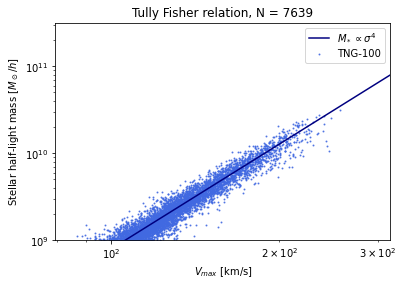

In [11]:
data = velocities(data)
data.plot.scatter(x="SubhaloVmax", y="SubhaloMassInHalfRadStellar",s=1, label = "TNG-100", alpha=0.8, color="royalblue")
#Power law to compare
FJx, FJy = powerLaw(a = 4, A= 10**0.9, xmin = 10, xmax = 1000)
plt.plot(FJx, FJy, color = "navy", label = r"$M_* \propto \sigma^{4} $")

il.formatplot.Vmax_SM(title = "Tully Fisher relation", df=data, x0=10**1.9, x1=10**2.5,y1=10**11.5)
plt.plot()

[]

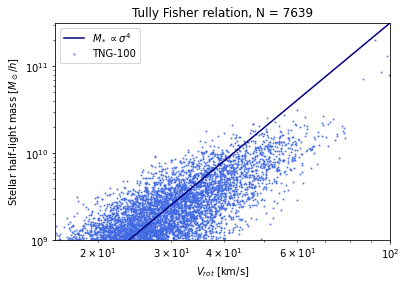

In [18]:
data.plot.scatter(x="SubhaloCircVel", y="SubhaloMassInHalfRadStellar",s=1, label = "TNG-100", alpha=0.8, color="royalblue")
#Power law to compare
FJx, FJy = powerLaw(a = 4, A= 10**3.5, xmin = 10, xmax = 1000)
plt.plot(FJx, FJy, color = "navy", label = r"$M_* \propto \sigma^{4} $")

il.formatplot.Vmax_SM(title = "Tully Fisher relation", df=data, x0=10**1.2, x1=10**2,y1=10**11.5)
plt.xlabel(r'$V_{rot}$ [km/s]')
plt.plot()